# Day 38 – Advanced Statistics

In this notebook, I will explore advanced statistical concepts that are crucial for data analysis and machine learning, including:

- Hypothesis Testing
- P-value and Statistical Significance
- Type I and Type II Errors
- Linear Regression (Simple & Multivariate)
- Evaluation Metrics (MSE, MAE, RMSE)
- ANOVA (Analysis of Variance)
- Regression Table Interpretation

---

## 1. Hypothesis Testing

### What is a Hypothesis?

A hypothesis is an idea that can be tested. It is a statement or claim that can be verified through data analysis. For example, the statement "apples in New York are expensive" is an idea. To turn it into a hypothesis, you need to make it testable, such as "the mean price of an apple in New York is more than 100 Rs."

#### Null (H0) and Alternative (H1) Hypotheses

Hypothesis testing is built on two competing hypotheses:

-   **Null Hypothesis (H0)**: This is the statement of no effect or no difference. It's the "status quo" that is assumed to be true until proven otherwise. It's like the legal principle "innocent until proven guilty."
-   **Alternative Hypothesis (H1 or HA)**: This is the statement you are trying to prove. It suggests there is a change, an effect, or a difference.

**Example 1 (Two-Sided Test):**
- **Scenario**: We want to test if the mean data scientist salary is equal to $113,000.
- H0: μ = 113,000
- H1: μ ≠ 113,000

We test if our sample's mean is close enough to the hypothesized population mean of $113,000. If it is, we accept the null hypothesis. If it's far, we reject the null hypothesis.

**Example 2 (One-Sided Test):**
- **Scenario**: A friend claims data scientists make more than $125,000.
- H0: μ ≤ 125,000
- H1: μ > 125,000

Here, the alternative hypothesis covers everything else. The researcher's goal is often to reject the null hypothesis and prove the alternative.


In [1]:
import numpy as np
from scipy import stats

# Example dataset: sample salaries (in USD)
sample_salaries = np.array([110000, 115000, 120000, 112000, 118000, 117000, 119000, 114000, 116000, 113000])

# Hypothesized mean salary
mu = 113000

# One-sample t-test
t_stat, p_val = stats.ttest_1samp(sample_salaries, mu)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject the null hypothesis (H0). The mean salary is significantly different from $113,000.")
else:
    print("Fail to reject the null hypothesis (H0). No significant difference from $113,000.")

T-statistic: 2.368626101855168
P-value: 0.04200342846626743
Reject the null hypothesis (H0). The mean salary is significantly different from $113,000.


---

## 2. P-value and Statistical Significance 

The **p-value** is the most common way to test a hypothesis. Instead of choosing a significance level beforehand, we find the smallest level of significance at which we can still reject the null hypothesis given our observed sample statistics.

- **The Rule**: You reject the null hypothesis if the **p-value is less than the significance level (α)**.
    - p < α: Reject H0. The result is statistically significant.
    - p > α: Accept H0. The result is not statistically significant.

**Example with Z-score**:
- If a Z-score is 2.12, the p-value for a one-sided test is 0.017 and for a two-sided test is 0.034.
  
- At a 5% significance level (α = 0.05), you would **reject the null hypothesis** for both tests because 0.017 < 0.05 and 0.034 < 0.05.

- At a 1% significance level (α = 0.01), you would **not reject the null hypothesis** for either test because both p-values are greater than 0.01.

- A p-value closer to 0.000 indicates a more statistically significant result.

---

## 3. Type I and Type II Errors

When conducting hypothesis tests, there are two types of errors we can make.

### Type I Error (False Positive)
- This occurs when you **reject a true null hypothesis**.
- **Analogy**: A medical test incorrectly says a healthy person has a disease.
- **Probability**: The probability of making a Type I error is denoted by **alpha (α)**, which is the significance level you choose.

### Type II Error (False Negative)
- This occurs when you **accept a false null hypothesis**.
- **Analogy**: A medical test incorrectly says a sick person is healthy.
- **Probability**: The probability of making a Type II error is denoted by **beta (β)**. This error is considered less serious in many cases.

**Power of the Test**: The probability of correctly rejecting a false null hypothesis is 1 - β, and this is called the **power of the test**. Researchers generally aim to increase the power of their test by increasing the sample size.


### Example – Let’s assume we are testing whether a person has a disease.

- **Null Hypothesis (H0):** The person is healthy.  
- **Alternative Hypothesis (H1):** The person has the disease.  

### Possible Outcomes:

1. **Correct Decision**  
   - Person is healthy → Test says healthy 
   - Person has disease → Test says diseased 

2. **Errors**  
   - **Type I Error (False Positive):**  
     Person is actually healthy, but the test says they are diseased.  
     *Consequence: unnecessary treatment.*  

   - **Type II Error (False Negative):**  
     Person is actually diseased, but the test says they are healthy.  
     *Consequence: missed diagnosis and no treatment.*  

In [2]:
import pandas as pd

data = {
    "Reality": ["Healthy", "Healthy", "Diseased", "Diseased"],
    "Test Result": ["Healthy", "Diseased", "Healthy", "Diseased"],
    "Outcome": ["Correct Decision", "Type I Error (False Positive)", 
                "Type II Error (False Negative)", "Correct Decision"]
}

df = pd.DataFrame(data)
df

,Reality,Test Result,Outcome
0,Healthy,Healthy,Correct Decision
1,Healthy,Diseased,Type I Error (False Positive)
2,Diseased,Healthy,Type II Error (False Negative)
3,Diseased,Diseased,Correct Decision


---

## 4. Linear Regression 

Regression is used to model the relationship between a dependent variable (Y) and one or more independent variables (X).

### Simple Linear Regression
- **Equation**: The basic equation for a line is y = mx + c.

- In regression, this becomes  ŷ = b0 + b1x1.
    - ŷ is the predicted value (dependent variable).
    - b0 is the intercept.
    - b1 is the slope or coefficient.
    - x1 is the independent variable.

- **Ordinary Least Squares (OLS)**: The most common method to find the "line of best fit." OLS aims to find the line that **minimizes the sum of squared errors (SSE)**, bringing the line as close as possible to all data points.

- We use **Ordinary Least Squares (OLS)** to find the line of best fit that minimizes the total error between actual and predicted values.

Intercept (b0): 32.33333333333334
Slope (b1): 6.121212121212119


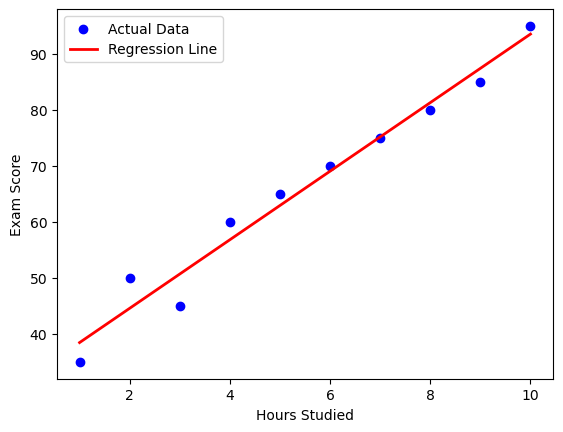

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example dataset: hours studied vs exam score
hours = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
scores = np.array([35, 50, 45, 60, 65, 70, 75, 80, 85, 95])

# Fit regression model
model = LinearRegression()
model.fit(hours, scores)

# Predictions
predicted = model.predict(hours)

# Equation
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

# Visualization
plt.scatter(hours, scores, color="blue", label="Actual Data")
plt.plot(hours, predicted, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.show()

### Multivariate Linear Regression

- This is an extension of simple linear regression that uses **multiple independent variables** (x1, x2, ..., xk) to predict a dependent variable.

- **Equation**: ŷ = b0 + b1x1 + b2x2 + ... + bkxk

- **Why it's used**: Real-world outcomes often depend on many factors.

- For example, house prices depend on size, location, and year of construction. This approach creates a more comprehensive and accurate model.


In [4]:
import pandas as pd

# Example dataset: House prices
data = pd.DataFrame({
    "Size_sqft": [1000, 1500, 2000, 2500, 3000],
    "Bedrooms": [2, 3, 3, 4, 4],
    "Price": [200000, 250000, 280000, 350000, 400000]
})

X = data[["Size_sqft", "Bedrooms"]]
y = data["Price"]

multi_model = LinearRegression()
multi_model.fit(X, y)

print("Intercept (b0):", multi_model.intercept_)
print("Coefficients (b1, b2):", multi_model.coef_)

Intercept (b0): 79999.99999999983
Coefficients (b1, b2): [   86.66666667 13333.33333333]


---

## 5. Evaluation Metrics (MSE, MAE, RMSE)

To check how good our regression model is, we use error metrics:

- **MAE (Mean Absolute Error):** Average of absolute differences. 


  mae = |actual - predicted|  

- **MSE (Mean Squared Error):** Average of squared differences.  


   mse = (actual - predicted)²  

- **RMSE (Root Mean Squared Error):** Square root of MSE.  


  rmse = √(mse)  


- MAE is easier to interpret (average error).  
- MSE/ RMSE penalize large errors more (good when big mistakes are costly).

---

## 6. ANOVA (Analysis of Variance) & R-squared

ANOVA is a collection of statistical models used to analyze the difference between means. In regression, it helps us understand our model's accuracy by decomposing the total variability of the data.

- **SST (Sum of Squares Total)**: Measures the total variability of the dataset.
- **SSR (Sum of Squares Regression)**: Measures the variability that is explained by your regression line. This shows how well your line fits the data.
- **SSE (Sum of Squares Error)**: Measures the unexplained variability. We want to minimize this value.

The relationship between them is: **SST = SSR + SSE**

### R-squared (R²) and Adjusted R-squared

- **R-squared (R²)**: This is a performance measure that tells us the proportion of the total variability explained by the model. It ranges from 0 to 1.
    
    - Formula: R² = 1 - SSR / SST    
    
    - **Limitation**:R² can be misleading because it always increases when you add more independent variables, even if they are irrelevant.

- **Adjusted R-squared**: This is a modified version of R² that penalizes the model for adding useless variables. It's a more reliable measure for comparing models with different numbers of predictors.
    
    - **Rule**: Adjusted R² is always less than or equal to R².

---

## 7. Interpreting a Regression Table

Statistical software provides a regression table that is the heart of the analysis. It typically has three parts:

-   **Model Summary**: Provides overall statistics like R^2 and Adjusted R^2 for the model.
-   **ANOVA Table**: Summarizes the sources of variance (SST, SSR, SSE) and includes the F-statistic for overall model significance.
-   **Coefficient Table**: This is the most important part.
    -   **Coefficients**: Provides the values for the intercept (b0) and the slopes (b1, b2,...) of each independent variable.
    -   **P-value**: Each coefficient has a corresponding p-value. This is used to test the hypothesis that the coefficient is 0 (H0: β = 0$$). A low p-value (typically < 0.05) indicates that the variable is a significant predictor in the model.


In [5]:
import statsmodels.api as sm

# Add constant for intercept
X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()

# Regression summary table
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     93.95
Date:                Wed, 20 Aug 2025   Prob (F-statistic):             0.0105
Time:                        20:10:58   Log-Likelihood:                -51.575
No. Observations:                   5   AIC:                             109.1
Df Residuals:                       2   BIC:                             108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           8e+04   2.97e+04      2.697      0.1

C:\Users\Arman\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


---

## Summary – Advanced Statistics

- **Hypothesis Testing:** Framework for testing claims using H0 and H1.  
- **P-value:** Probability measure to decide whether to reject H0.  
- **Errors:** Type I (false positive) and Type II (false negative).  
- **Regression:** Simple & multivariate regression for modeling relationships.  
- **ANOVA:** Decomposes variability into explained (SSR) and unexplained (SSE).  
- **R² & Adjusted R²:** Performance metrics for regression models.  
- **Regression Table:** Key output for interpreting model coefficients and significance.  
